In [2]:
#import dependencies

import pandas as pd
# settings to display all columns
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets
from scipy import stats
from scipy.stats import linregress


#datafiles

hourly_demog = "Sql Data/employee_hourly_demographic.csv"
salary_demog = "Sql Data/employee_salary_demographic.csv"
emp_satis = "Sql Data/employee_satisfaction.csv"
emp_sources = "Sql Data/employee_sources.csv"
hourly_wage = "Sql Data/hourly_employee_wage.csv"
salary_wage = "Sql Data/salary_employee_wage.csv"
term_employees = "Sql Data/terminated_employees.csv"

#read into panda

hourly_demog = pd.read_csv(hourly_demog)
salary_demog = pd.read_csv(salary_demog)
emp_satis = pd.read_csv(emp_satis)
emp_sources = pd.read_csv(emp_sources)
hourly_wage = pd.read_csv(hourly_wage)
salary_wage = pd.read_csv(salary_wage)
term_employees = pd.read_csv(term_employees)




In [3]:
#Drop Duplicates
hourly_demog.drop_duplicates(subset=['employee_no'], keep='first', inplace=True)
hourly_demog
hourly_demog.to_csv("Tableau csv/hourly_demog.csv", index=False, header=True)

In [4]:
hourly_employees_race = pd.DataFrame(pd.value_counts(hourly_demog["race_desc"]))
hourly_employees_race

,race_desc
White,99
Black or African American,22
Asian,16
Two or more races,6
American Indian or Alaska Native,3
Hispanic,2


<function matplotlib.pyplot.show(close=None, block=None)>

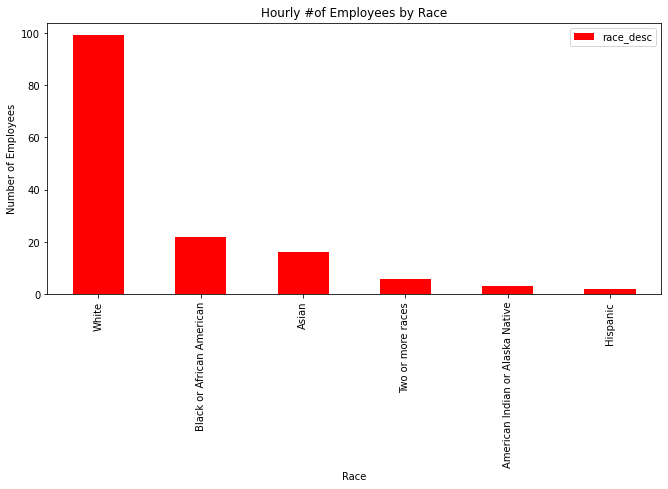

In [5]:
hourly_employees_race.plot(kind="bar", color="r", figsize=(11,5))
plt.title("Hourly #of Employees by Race")
plt.xlabel("Race")
plt.ylabel("Number of Employees")
plt.savefig("Plots/Hourly Positions x Race")
plt.show


In [6]:
hourly_employees_gender = pd.DataFrame(pd.value_counts(hourly_demog["sex"]))
hourly_employees_gender

,sex
Female,92
Male,56


<function matplotlib.pyplot.show(close=None, block=None)>

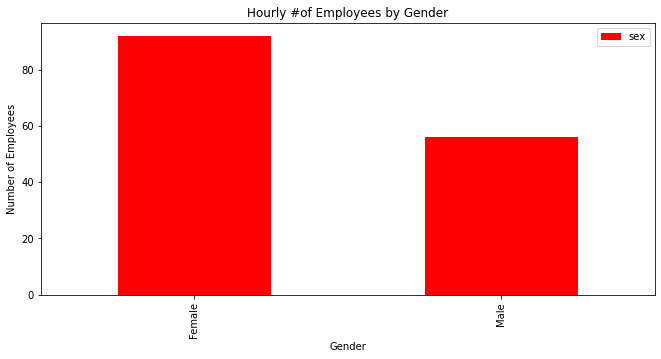

In [7]:
hourly_employees_gender.plot(kind="bar", color="r", figsize=(11,5))
plt.title("Hourly #of Employees by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
plt.savefig("Plots/Hourly Positions x Gender")
plt.show


In [8]:
hourly_positions = pd.DataFrame(pd.value_counts(hourly_demog["position"]))

In [13]:
bins = [19, 29, 39, 49, 59]
group_names = ["19-29", "30-39", "40-49", "50+"]
hourly_age["Age Summary"] = pd.cut(hourly_demog["age"], bins, labels=group_names, include_lowest=True)
hourly_age

,age,Age Summary
34,13,40-49
40,10,19-29
32,10,30-39
29,8,NaN
38,8,NaN
31,8,30-39
41,7,40-49
43,7,30-39
37,5,30-39
39,5,30-39


ValueError: could not convert string to float: 'ClericalClericalClericalIT SupportIT SupportIT SupportProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician IProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician SeniorProduction Technician Senior'

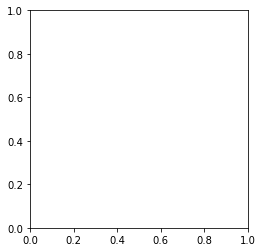

In [123]:
# hourly_position = hourly_demog["position"]
# hourly_gender = hourly_demog["sex"]
# colors = ["#1f77b4", "#ff7f0e"]
# explode = (0.1,0.1,0.1,0.1)
# plt.pie(hourly_gender, labels=hourly_demog, explode=explode, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
# plt.title("Positions by Gender")
# plt.show

hourly_position_no = hourly_demog.groupby(hourly_demog["sex"])["position"].sum()
plt.pie(hourly_position_no, labels=hourly_position_no.index);
plt.show()